# Perfom "Exploratory Data Analysis" on Dataset SampleSuperstore and as a business manager, try to find out the weak areas where you can work to make more profit

# Load and prepare the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('SampleSuperstore.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None
        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consum

# Convert Categorical Variables to Numerical

In [2]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded dataset
print(df_encoded.head())

   Postal Code     Sales  Quantity  Discount    Profit  Ship Mode_Same Day  \
0        42420  261.9600         2      0.00   41.9136               False   
1        42420  731.9400         3      0.00  219.5820               False   
2        90036   14.6200         2      0.00    6.8714               False   
3        33311  957.5775         5      0.45 -383.0310               False   
4        33311   22.3680         2      0.20    2.5164               False   

   Ship Mode_Second Class  Ship Mode_Standard Class  Segment_Corporate  \
0                    True                     False              False   
1                    True                     False              False   
2                    True                     False               True   
3                   False                      True              False   
4                   False                      True              False   

   Segment_Home Office  ...  Sub-Category_Envelopes  Sub-Category_Fasteners  \
0      

# Summary Statistics and Correlation Analysis

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000
                       Postal Code     Sales  Quantity  Discount    Profit  \
Postal Code               1.000000 -0.023854  0.012761  0.058443 -0.029961   
Sales                    -0.023854  1.000000  0.200795 -0.028190  0.479064   
Quantity                  0.012761  0.200795  1.000000  0.008623  0.066253   
Discount                  0.058

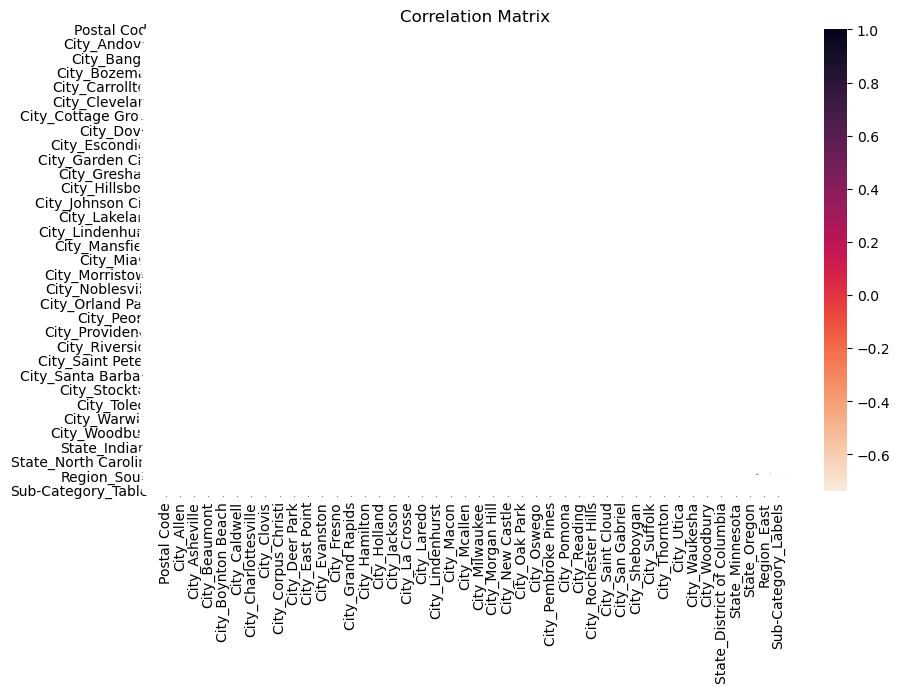

In [3]:
# Summary statistics for numerical columns
summary_stats = df_encoded.describe()
print(summary_stats)

# Correlation matrix for numerical columns
correlation_matrix = df_encoded.corr()
print(correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r')
plt.title('Correlation Matrix')
plt.show()

# Sales and Profit Analysis

In [4]:
# Sales and Profit by Region
sales_profit_region = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
print(sales_profit_region)

# Sales and Profit by Category
sales_profit_category = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
print(sales_profit_category)

# Sales and Profit by Sub-Category
sales_profit_sub_category = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
print(sales_profit_sub_category)

# Sales and Profit by Segment
sales_profit_segment = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
print(sales_profit_segment)

               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
South    391721.9050   46749.4303
Central  501239.8908   39706.3625
                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Office Supplies  719047.0320  122490.8008
Furniture        741999.7953   18451.2728
                    Sales      Profit
Sub-Category                         
Copiers       149528.0300  55617.8249
Phones        330007.0540  44515.7306
Accessories   167380.3180  41936.6357
Paper          78479.2060  34053.5693
Binders       203412.7330  30221.7633
Chairs        328449.1030  26590.1663
Storage       223843.6080  21278.8264
Appliances    107532.1610  18138.0054
Furnishings    91705.1640  13059.1436
Envelopes      16476.4020   6964.1767
Art            27118.7920   6527.7870
Labels         12486.3120   5546.2540
Machines      189238.6310   3384.7569
Fasteners       

# Identifying Weak Areas
# Based on the analysis, you can identify weak areas where improvements can be made:
# Regions with Low Profit: Identify regions with low profit margins and investigate potential reasons, such as high operational costs or lower sales volumes.
# Categories/Sub-Categories with Low Profit: Identify categories or sub-categories that are underperforming. Consider revising pricing strategies, marketing efforts, or discontinuing unprofitable products.¶
# Segments with Low Profit: Identify customer segments that are less profitable and explore ways to increase their profitability through targeted marketing or adjusted service offerings.
# Impact of Discounts: Analyze if higher discounts are leading to lower profits. Consider optimizing discount strategies to balance sales volume and profit margins.

# Discount Analysis

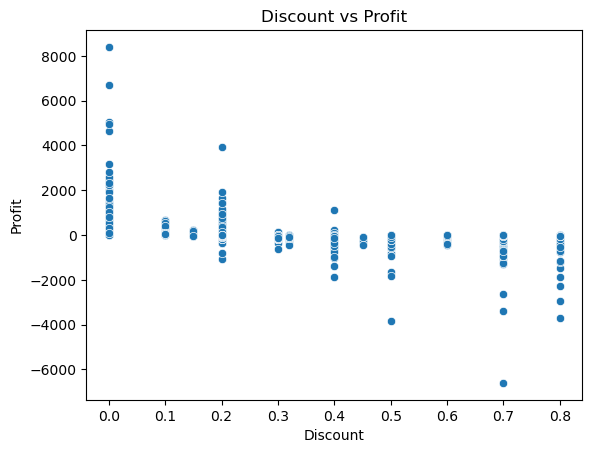

In [5]:
# Scatter plot of Discount vs Profit
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.show()

# Region Analysis:

# If the South region shows significantly lower profit compared to other regions, it may indicate a need for a more efficient supply chain or better marketing strategies in that area.
# Category Analysis:

# If the Technology category is highly profitable, while Office Supplies is not, focus more on promoting and expanding the Technology category.
# Discount Analysis:

# If higher discounts lead to lower profits, consider implementing a tiered discount strategy where discounts are only offered on bulk purchases.
# #

# By systematically analyzing each dimension, you can identify and address specific weak areas to improve overall profitability